# **Capstone project: Providing data-driven suggestions for HR**

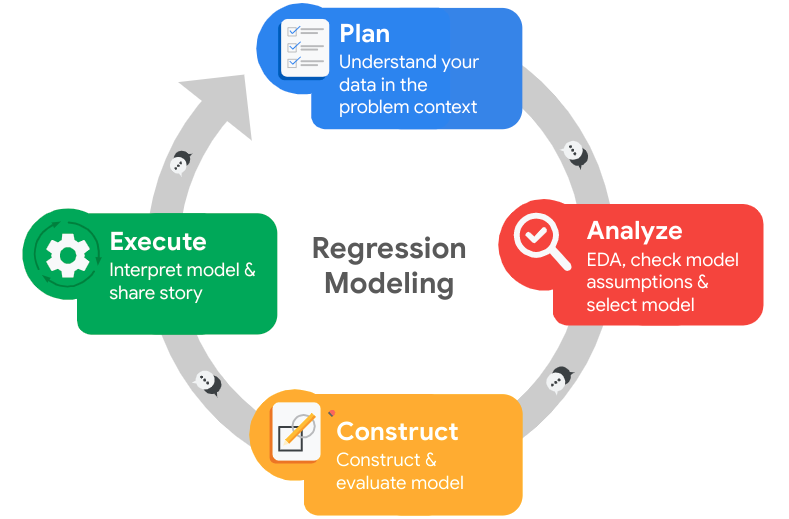

## **Pace: Plan**

### Understanding the business scenario and problem

Salifort Motors faces a challenge in boosting employee satisfaction. The HR department gathered data from employees, seeking insights to predict potential departures. The goal is to build a simple model to foresee who might leave, aiding in understanding and tackling the root causes. This predictive model aims to offer practical suggestions for HR to enhance overall satisfaction and retention.

Anticipated benefits include targeted interventions to reduce turnover and foster a positive work atmosphere. Sharing findings on GitHub ensures transparency and serves as a useful guide for HR in implementing strategies to improve employee satisfaction and retention at Salifort Motors.

By focusing on the collected data, we aim to identify factors contributing to employee turnover. The predictive model's insights will guide strategic initiatives for a more informed approach to employee retention. This effort is crucial for minimizing recruitment costs and maintaining a stable workforce.

### The HR dataset

In this lab, we'll explore a dataset comprising 15,000 entries and featuring 10 columns, each representing different aspects of employee-related information. No need to download the data separately; it's readily available for your use. For more specifics about the dataset, you can check its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In this capstone project for Salifort Motors, a central role is played by a team of stakeholders, including the senior leadership team, the Human Resources department, an data analysis team. Genuine concern about the company's elevated turnover rate is expressed by the senior leadership team, emphasizing the necessity for effective solutions that improve retention, job satisfaction, and address the financial repercussions tied to recruitment and training costs. As data professionals, our responsibility lies in collaboratively analyzing survey data, designing a predictive model, and presenting recommendations aligned with the overarching goal of mitigating turnover-related challenges.

The primary objective is the construction of a predictive model capable of discerning whether an employee is likely to leave Salifort Motors. Insights from various factors such as job title, department, number of projects, and average monthly hours are sought to unravel the intricacies of employee turnover. Through thorough analysis of the survey data, an effort is made to identify the key drivers behind turnover, providing the foundation for strategic and targeted retention initiatives. The final deliverable encompasses actionable recommendations, grounded in data-driven insights, which will be presented to the senior leadership team. These recommendations aim not only to improve retention and job satisfaction but also contribute to significant cost savings by addressing the root causes of turnover.

## Importing dataset



### Import packages

In [4]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.7 MB/s eta 0:00:00a 0:00:01


In [6]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model evaluation

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve




### Loading dataset

In [7]:
# Loading dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

Now, let's move on to the second step of our project – Data Exploration. In this phase, we'll take a close look at our dataset to get a good grasp of what's inside. This means checking out each variable, understanding how they behave, and seeing if they have any connections.

Why is this important? Well, before we build our predictive model, we want to be sure we know our data inside out. Exploratory Data Analysis (EDA) helps us spot any interesting patterns, trends, or unusual stuff in the data. This knowledge is like a roadmap for building our model – it guides us on what features to include and how to make our predictions more accurate.

As we dig into the data, we'll also clean things up a bit. We'll keep an eye out for missing info, toss out anything we don't need, and deal with any numbers that seem a bit out of place. Cleaning up the dataset is like making sure our tools are sharp before we start building our model. It makes everything smoother and sets us up for success down the road. So, let's jump into the data, understand its ins and outs, and make sure it's all set for the next steps in our project.



### Gathering basic information about the data

In [8]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Our dataset is made up of 14,999 rows and 10 columns. Within these columns, we have a mix of different types of variables. Specifically, there are 6 columns with whole numbers (integers), 2 columns with decimal numbers (floats), and 2 columns with categorical information (object type variables). This diversity in variable types gives us a good starting point for exploring and understanding the different aspects of our data. As we proceed, we'll delve into each variable to unravel insights and ensure our dataset is well-prepared for the subsequent analysis and modeling steps.

### Gathering descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


According to the descriptive statistics, it appears that the column `time_spend_company` may contain outliers. This suspicion arises from observing that the maximum value in this column is almost 3 standard deviations away from the third quartile (Q3). Identifying outliers is crucial in data analysis, as they can significantly impact statistical measures and potentially skew the results of our analysis. In the next steps, we may want to further investigate and handle these potential outliers to ensure the accuracy and reliability of our findings.

### Data preprocessing

Now, let's clean up the dataset by renaming the columns. We'll stick to the `snake_case` style for consistency, fix any typos, and make names more concise where necessary. This step aims to create a neat and user-friendly structure for easier analysis and model building in the next stages of our project. Let's proceed with these adjustments to ensure our dataset is well-organized and ready for the next steps.

In [10]:
# Display all column names
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [11]:
# Making all the column names lower case
df0.columns = df0.columns.str.lower()

def rename_columns(df, substring, replacement):
    df.columns = df.columns.str.replace(substring, replacement)
rename_columns(df0,'average_montly_hours', 'average_monthly_hours')
rename_columns(df0, 'time_spend_company', 'tenure')


# Displaying all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking missing values

To identify missing values in our dataset, we'll employ the `.isna()` method, which returns a Boolean value of `True` when missing values are present in specific instances. Additionally, we'll use `.sum(axis=0)` to calculate the total count of True values along the rows `(axis=0)`. 

In [12]:
# Check for missing values
df0.isna().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There is not missing value in dataset

### Check duplicates

Next we will check for duplicate values in the dataset

In [13]:
# Check for duplicates
df0.duplicated().sum()

3008

In [14]:
# Calculate the percentage of duplicate rows in the DataFrame df0

# df0.duplicated(): Generates a Boolean Series, marking True for duplicate rows and False otherwise
# .sum(): Counts the number of True values in the Boolean Series, representing the total count of duplicated rows
# / df0.shape[0]: Divides the count of duplicated rows by the total number of rows in the DataFrame to get the proportion
# * 100: Converts the proportion into a percentage
# round(..., 2): Rounds the percentage to two decimal places
# f'{...} %': Formats the result into a string with a percentage sign at the end

percentage_of_duplicates = f'{round(df0.duplicated().sum() / df0.shape[0] * 100, 2)} %'

# Output the calculated percentage
print(percentage_of_duplicates)


20.05 %


We've identified 3008 duplicated values in the dataset, which makes up about 20 percent of the total data. It's important to take a closer look at these duplicates for a better understanding. This further inspection will help us figure out why they exist and guide us in making informed decisions during the data cleaning process.

In [15]:
# Inspect some rows containing duplicates as needed
duplicate = df0[df0.duplicated()]
duplicate

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


The output above displays the initial occurrences of rows that later repeat in the dataframe. Considering the nature of the dataset, it seems quite implausible that two employees independently reported identical responses for every column. Given the presence of several continuous variables across 10 columns, the likelihood of these observations being legitimate is low.

Rather than conducting a formal likelihood analysis using Bayes' theorem, we can make a practical decision. The unusual consistency across multiple columns strongly suggests these duplicates are not valid entries. Therefore, it's reasonable to proceed by removing them from the dataset to ensure data integrity and the reliability of our subsequent analyses.

In [16]:
# Dropping duplicates
df1 = df0.drop_duplicates(keep='first')

# Displaying first few rows
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking outliers

Check for outliers in the data.

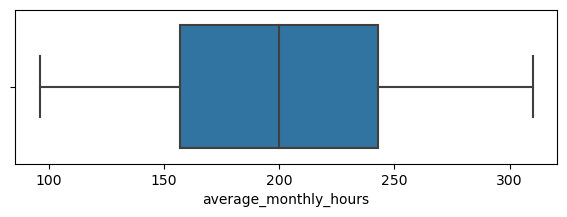

In [22]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(7,2))
sns.boxplot(x=df1['average_monthly_hours'])
plt.show()


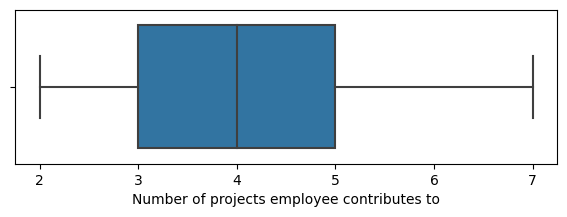

In [21]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df1['number_project'])
plt.xlabel('Number of projects employee contributes to')
plt.show()

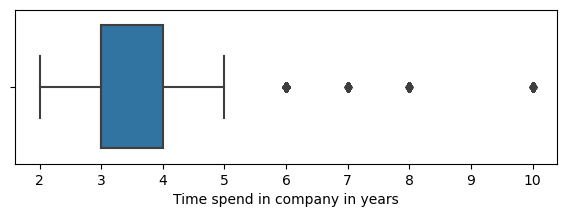

In [23]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df1['tenure'])
plt.xlabel("Time spend in company in years")
plt.show()

As we suspected, `tenure` variable cotains outlier. We will deternine number of rows containing outliers

In [24]:
# Determine the number of rows containing outliers
# finding 1st quartile
q1 = df1['tenure'].quantile(0.25)
# finding 3rd quartile
q3 = df1['tenure'].quantile(0.75)
#defining interquartile range 
iqr = q3-q1

# Defining upper and lower limit of non outlier value of `tenure`
upper_threshold = q3 + 1.5 * iqr
lower_threshold = q1 - 1.5 * iqr
print(f'Upper limit is {upper_threshold}')
print(f'Lower limit is {lower_threshold}')
num_outliers  =len(df1[df1['tenure']<lower_threshold]&df1[df1['tenure']>upper_threshold])
print(f'Number of rows containing the outliers: {num_outliers}')

Upper limit is 5.5
Lower limit is 1.5
Number of rows containing the outliers: 824


It is visible from boxplot that upper threshold is little bit higer than than 5. However, we could also use statistical method to find out the exact number for upper threshold is 5.5 years

Certain types of models are more sensitive to outliers than others like Logistic regression. When we get to the stage of building your model, we will consider to remove outliers

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Data Exploration

We will begin by understanding how many employees left and what percentage of all employees this figure represents.

0    10000
1     1991
Name: left, dtype: int64


<Axes: ylabel='left'>

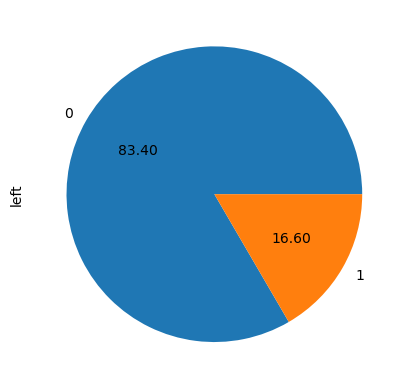

In [25]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True).plot.pie(autopct ='%.2f')


Around 17% of the employees have left the company, suggesting some imbalance in our target variable. However, it's not too significant. Therefore, we've chosen not to address this class imbalance for now.

### Data visualizations

Now, we will examine variables that we are interested in, and creating plots to visualizing relationships between variables in the data. Before that we will define to add labels to count plots for better visibility of graphs

In [26]:
def add_labels_to_countplot(ax,height_offset=0.5):
    """
    Add labels to the bars of a seaborn countplot.

    Parameters:
    - ax: The Matplotlib axis object.
    - height_offset: The vertical offset for the label above each bar.
    """

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + height_offset, height, ha="center")

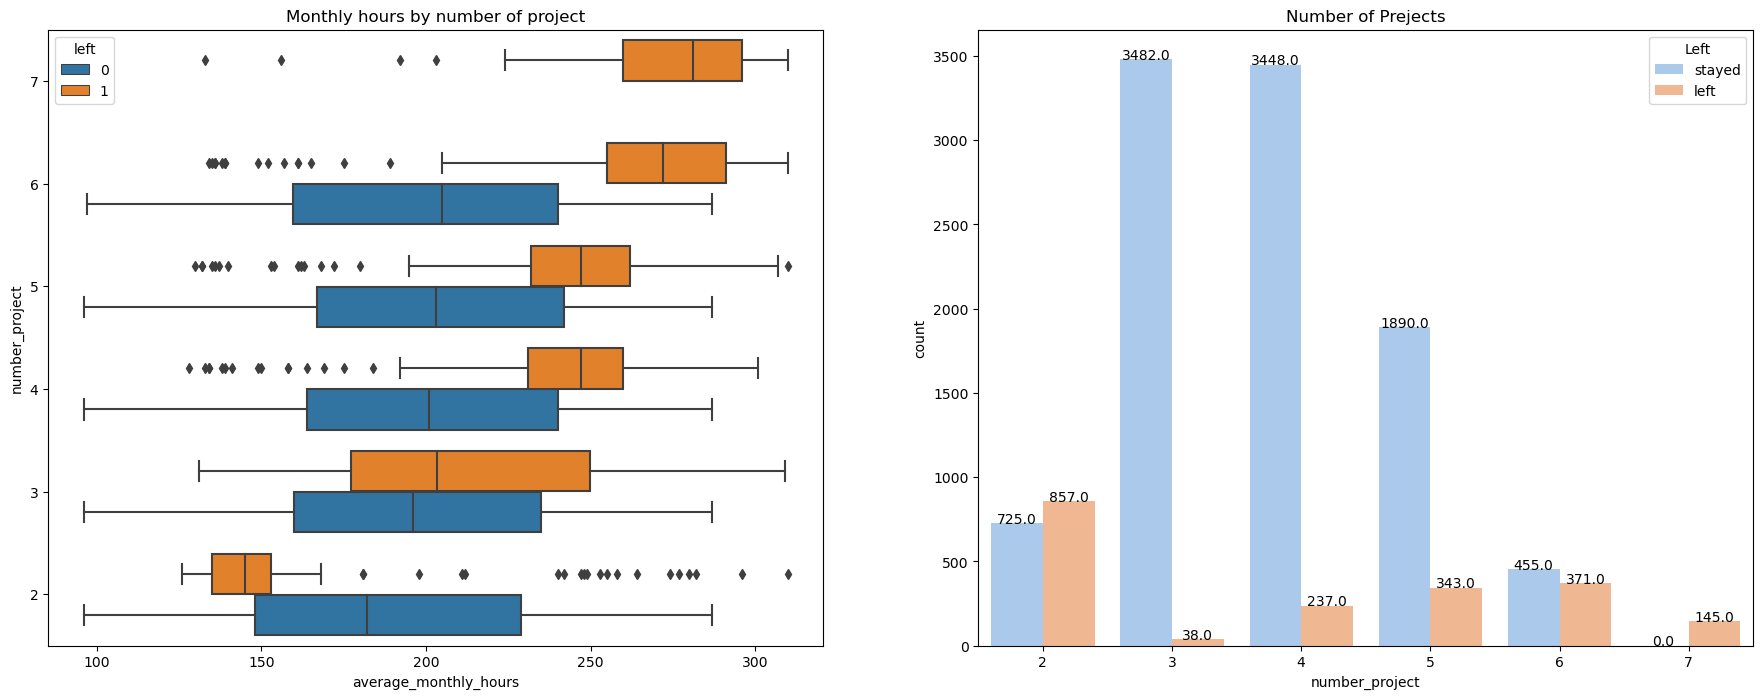

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot of 'average_monthly_hours' distribution for 'number_project', comparing employees who stayed
sns.boxplot(data=df1, x='average_monthly_hours', y = 'number_project', hue='left', orient='h', ax=ax[0])
ax[0].set_title('Monthly hours by number of project')
ax[0].invert_yaxis()

# Distribution of `number_project`, comparing employees who stayed versus those who left
sns.countplot(x = 'number_project', hue = 'left', data = df1,palette='pastel', ax = ax[1])
plt.legend(title='Left', labels=['stayed', 'left'])
add_labels_to_countplot(ax[1])
ax[1].set_title('Number of Prejects')

plt.show()

It's natural for individuals handling multiple projects to put in longer hours, as indicated by the average hours increasing with the number of projects in both the retained and departed groups. However, noteworthy patterns emerge from the data.

Among those who left, there are two distinct categories: (A) those who worked significantly fewer hours than their peers with the same project count and (B) those who put in considerably more hours. The first group (A) may have been terminated, or it's plausible that they were employees who had already resigned and were assigned fewer hours during their notice period. As for group B, it's likely that these individuals resigned voluntarily and were perhaps crucial contributors to their projects.

Notably, everyone with seven projects left the company, and both the median and interquartile ranges for this group and those who left with six projects were notably higher (approximately 255–295 hours/month) compared to other groups.

The sweet spot for the optimal number of projects for employees seems to be in the range of 3–4. In these cohorts, the ratio of those who left to those who stayed is significantly lower.

Assuming a 40-hour workweek and two weeks of vacation annually, the average monthly working hours for Monday–Friday employees would be 173 hours. Interestingly, apart from those with two projects, every group—whether they left the company or not—put in significantly more hours than this benchmark, suggesting a potential issue of employees being overworked.

Our next step involves creating a scatter plot to analyze the relationship between `average_monthly_hours` and `satisfaction_level`, taking into account the target variable `left`. Additionally, we'll introduce a reference point to provide context. Considering there are 52 weeks in a year, the yearly average hours for a full-time employee amount to `40 hours/week * 52 weeks = 2080` hours. Dividing this by 12 months gives us a monthly average of `2080/12 = 173.33 hours`.

To visually highlight this average working hours threshold, we'll incorporate a vertical line on the scatter plot. This reference line will serve as a guide, helping us assess how individual data points align with or deviate from the typical monthly working hours.

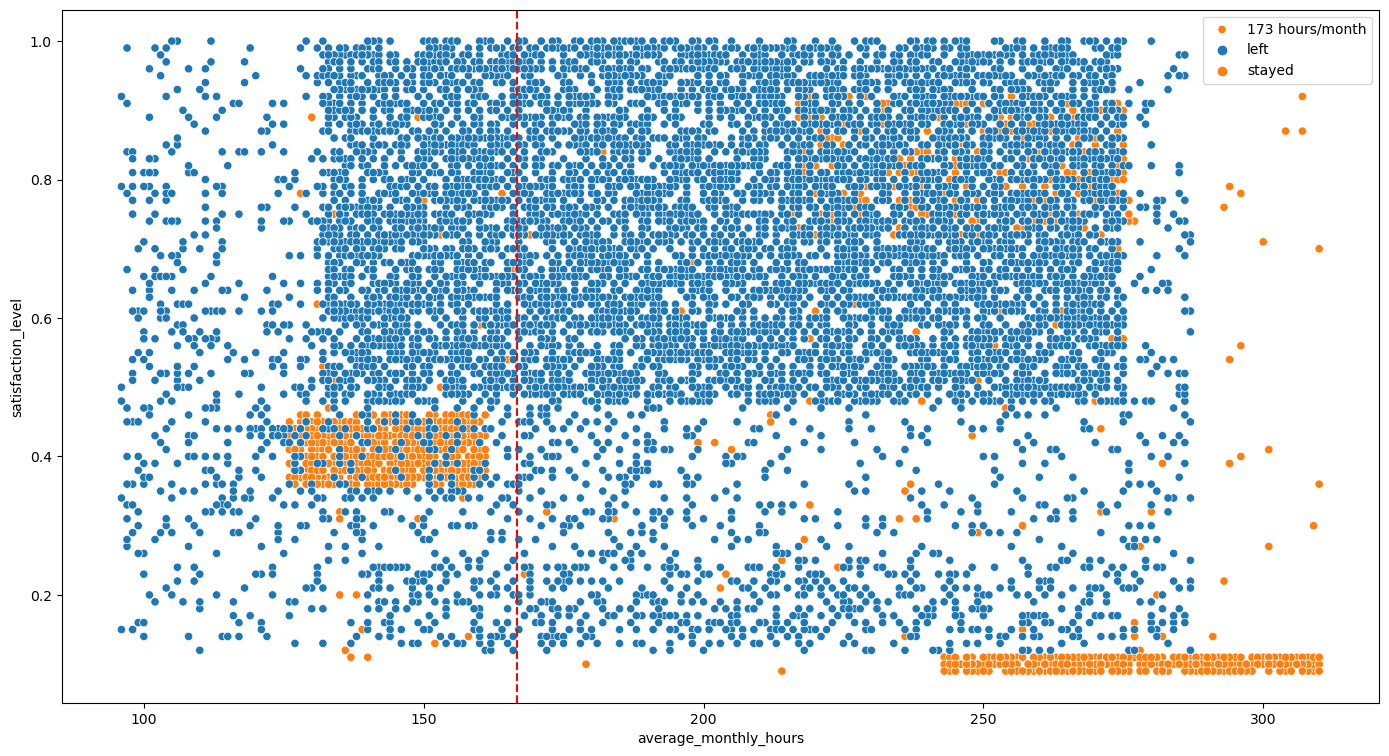

In [28]:
plt.figure(figsize=(17,9))

sns.scatterplot(x=df1['average_monthly_hours'], y=df1['satisfaction_level'], hue=df1['left'])
plt.axvline(x=166.67, color='r', label='173 hours/month', ls='--')
plt.legend(labels=['173 hours/month', 'left', 'stayed'] )
plt.show()

The scatterplot above reveals a significant portion of employees dedicating approximately 240–315 hours per month, exceeding 75 hours per week throughout the year. This substantial commitment appears to correlate with their satisfaction levels nearing zero.

Furthermore, the plot displays another subset of departing individuals who adhered to more conventional work hours. Despite this, their satisfaction scores lingered around 0.4. Speculating on the reasons behind their departure is challenging. It's plausible they felt compelled to extend their working hours due to the prevailing trend among their peers, potentially impacting their satisfaction negatively.

Finally, a group is depicted putting in roughly 210–280 hours per month, with satisfaction levels ranging from 0.7 to 0.9.

It's essential to note the peculiar shape of these distributions, suggesting the potential presence of data manipulation or the inclusion of synthetic data.

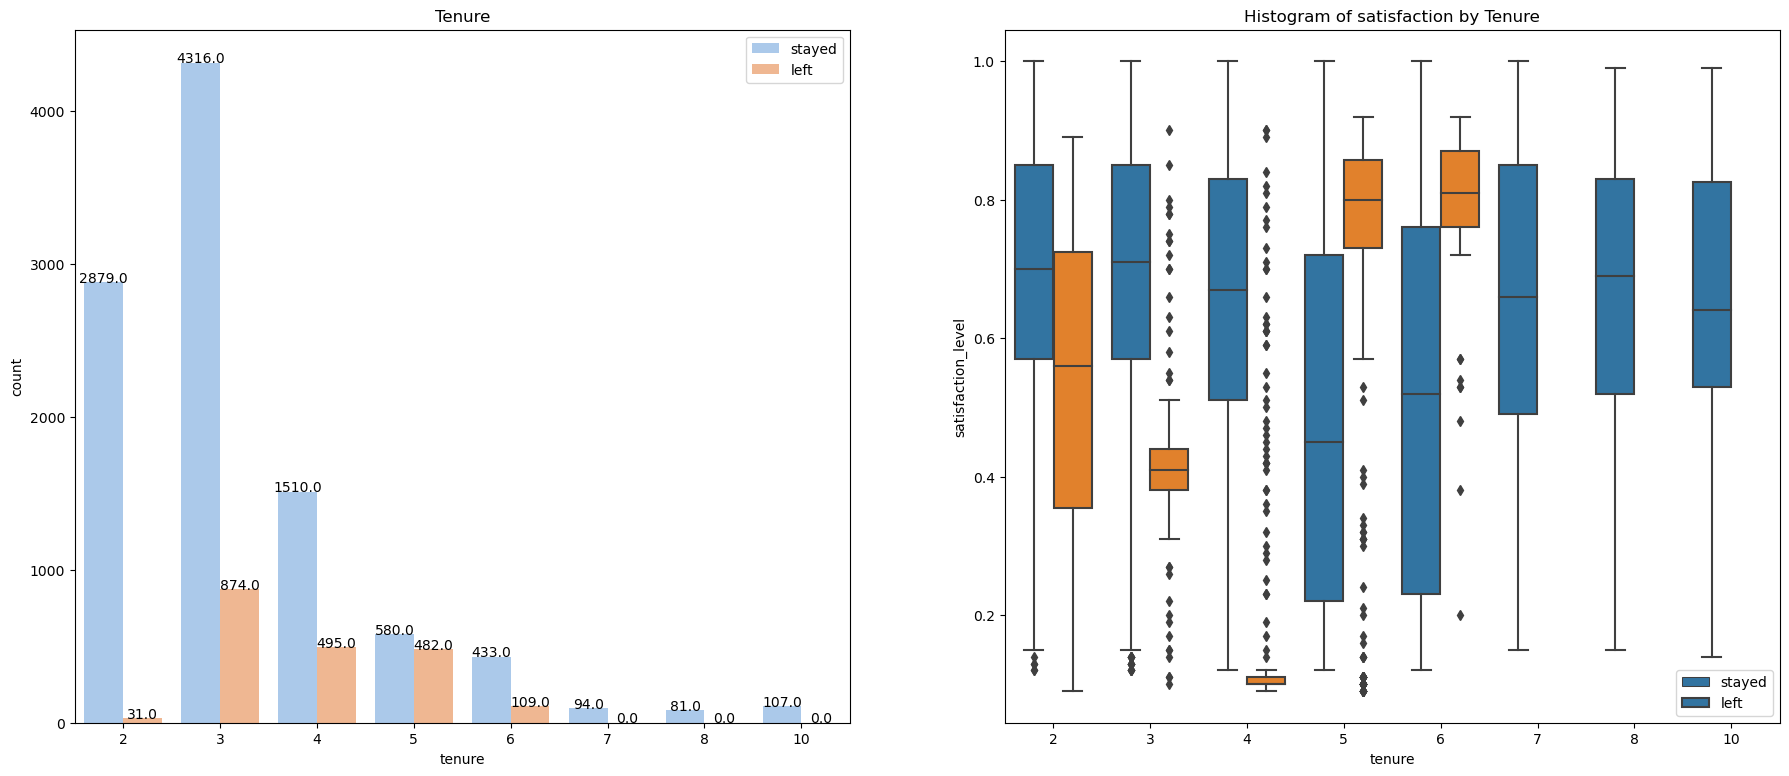

In [29]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22,9))
sns.countplot(
    x = 'tenure', 
    hue = 'left', 
    data = df1,
    palette='pastel',
    ax=ax[0])
add_labels_to_countplot(ax[0])
ax[0].legend(labels=['stayed', 'left'])
ax[0].set_title('Tenure')

sns.boxplot(y=df1['satisfaction_level'], 
            x = df1['tenure'], 
            hue=df1['left'], 
            ax = ax[1])
ax[1].legend(labels=['stayed', 'left'])
ax[1].set_title('Histogram of satisfaction by Tenure')


plt.show()


Several noteworthy observations can be drawn from this plot.

- Firstly, departing employees can be broadly categorized into two groups: dissatisfied individuals with shorter tenures and highly satisfied employees with medium-length tenures.

- Secondly, there's a peculiarly low satisfaction level among employees who left after four years. It would be worthwhile to investigate any changes in company policies that might have specifically impacted individuals at the four-year mark, if such information is available.

- Thirdly, the employees with the longest tenures chose to stay, and their satisfaction levels were comparable to those of newer employees who decided to remain.

- Lastly, the histogram indicates a relatively small number of employees with longer tenures. It's plausible that these individuals occupy higher-ranking and higher-paid positions within the company.

Next, we will examine level of different tenures

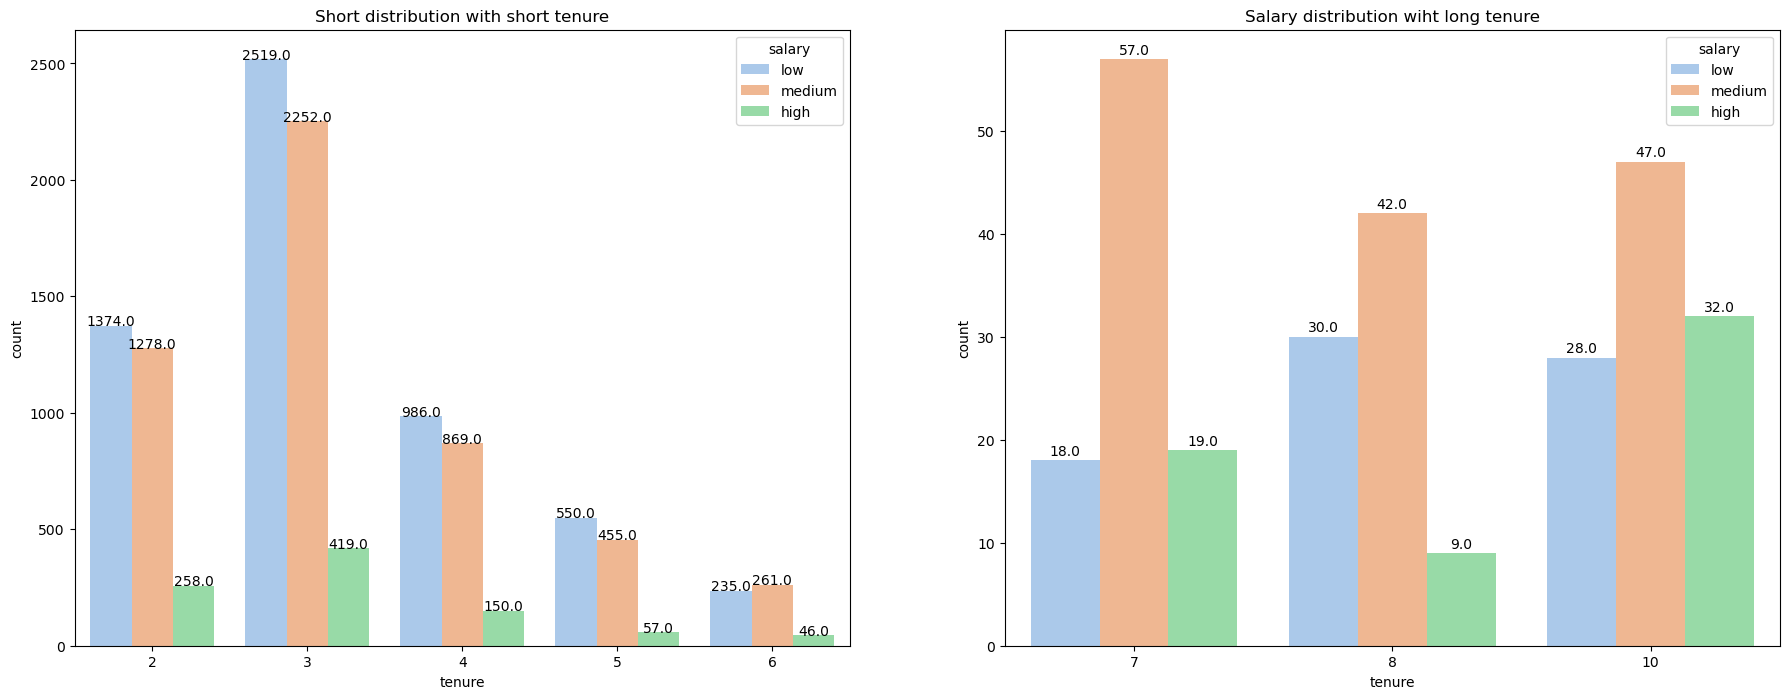

In [30]:
# set figure and axis
fig, ax = plt.subplots(1,2, figsize=(22, 8))

#define short tenure
tenure_short = df1[df1['tenure']<7]
tenure_long = df1[df1['tenure']>6]
sns.countplot(
    x = 'tenure', 
    hue = 'salary', 
    data = tenure_short,
    palette='pastel', 
    hue_order=['low', 'medium', 'high'],
    ax=ax[0])
add_labels_to_countplot(ax[0])
ax[0].set_title('Short distribution with short tenure')

sns.countplot(
    x = 'tenure', 
    hue = 'salary', 
    data = tenure_long,
    palette='pastel', 
    hue_order=['low', 'medium', 'high'],
    ax=ax[1])
add_labels_to_countplot(ax[1])
ax[1].set_title('Salary distribution wiht long tenure')

plt.show()

Based on the information depicted in the plots, employees who have been with the company for a longer period of time (long-tenured employees) are not significantly overrepresented among those who receive higher salaries or compensation. In other words, the length of tenure does not seem to be directly correlated with being in a higher-paid position within the company.

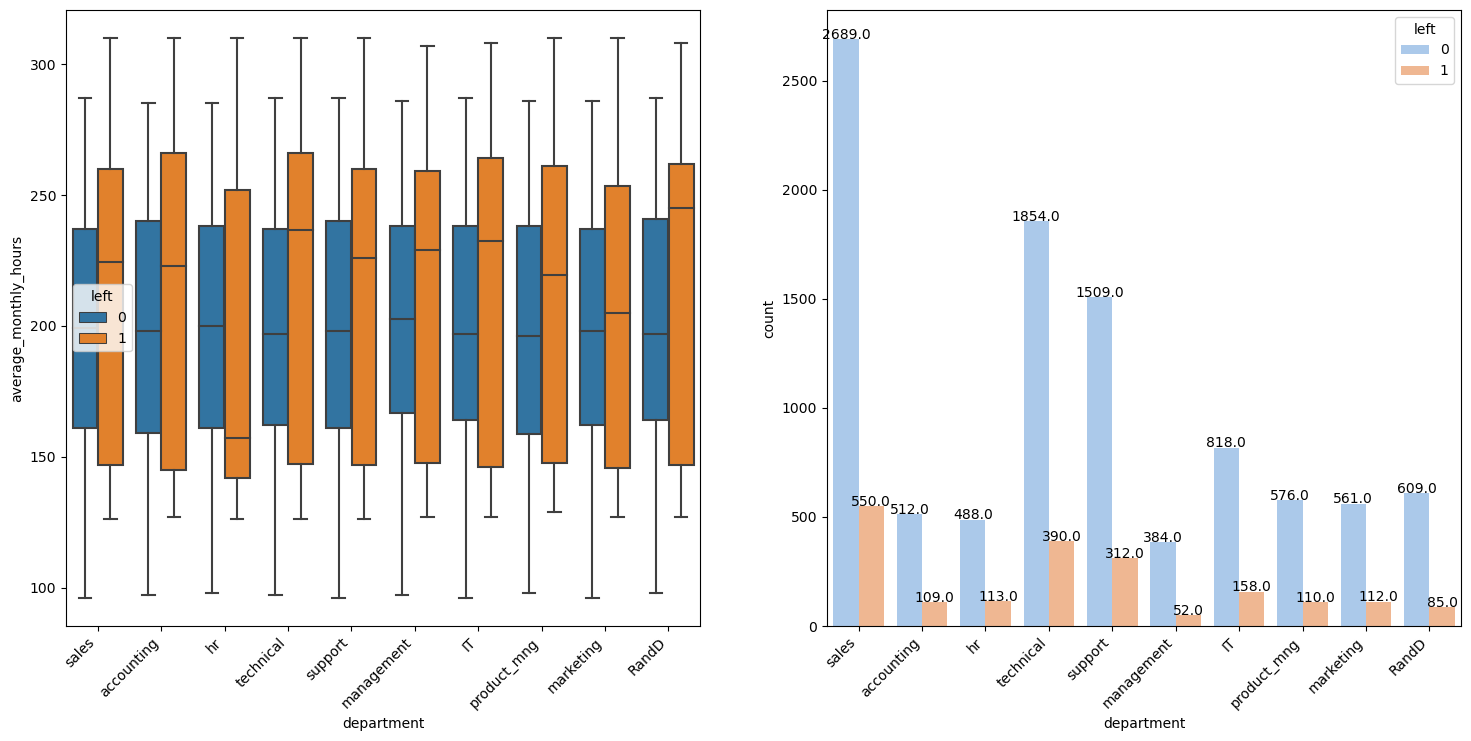

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

sns.boxplot(x= df1['department'], 
            y=df1['average_monthly_hours'], 
            hue=df1['left'], 
            ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Provide rotation and alignment


sns.countplot(x=df1['department'], 
              hue=df1['left'], 
              palette='pastel',
              ax=ax[1])
add_labels_to_countplot(ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Provide rotation and alignment

plt.show()



The plot above illustrates that the proportion of employees who left, categorized by department, is roughly consistent. This suggests that there is no apparent correlation between the department in which an employee works and their likelihood of leaving the company. In other words, the rate of employee departures seems to be similar across different departments, implying that the choice to leave is not strongly influenced by the specific department in which an individual is employed.

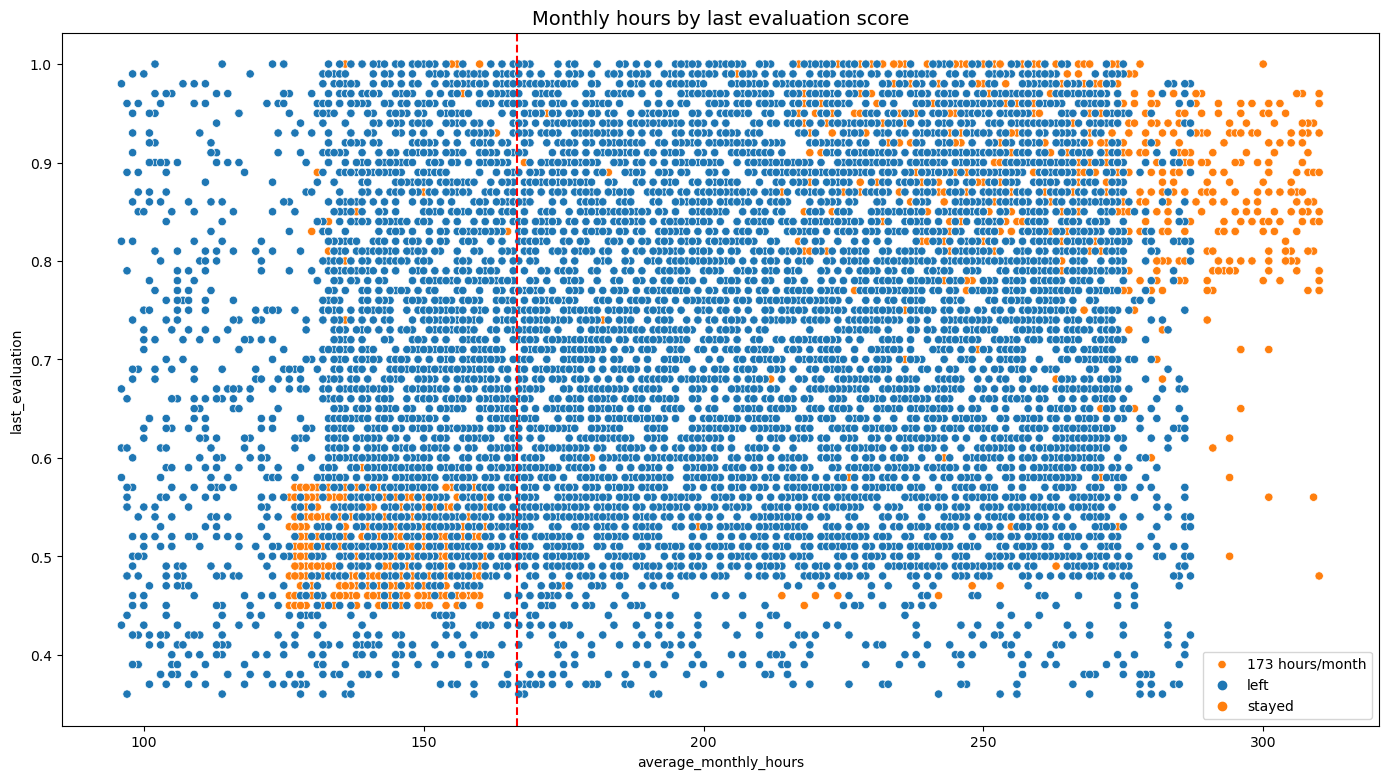

In [32]:
plt.figure(figsize=(17,9))

sns.scatterplot(x=df1['average_monthly_hours'], y=df1['last_evaluation'], hue=df1['left'])
plt.axvline(x=166.67, color='r', label='173 hours/month', ls='--')
plt.legend(labels=['173 hours/month', 'left', 'stayed'] )
plt.title('Monthly hours by last evaluation score', fontsize='14');

plt.show()

Next we examine the connection between average monthly working hours and promotion status over the last 5 years for employees in the dataset. The scatterplot below showcases individual data points, where the x-axis represents monthly hours, the y-axis denotes promotion status, and color distinguishes between employees who left and those who stayed.

A red dashed line at 173 hours serves as a visual reference point. By interpreting the plot, we aim to uncover potential insights into patterns related to employee retention, promotion, and working hours.

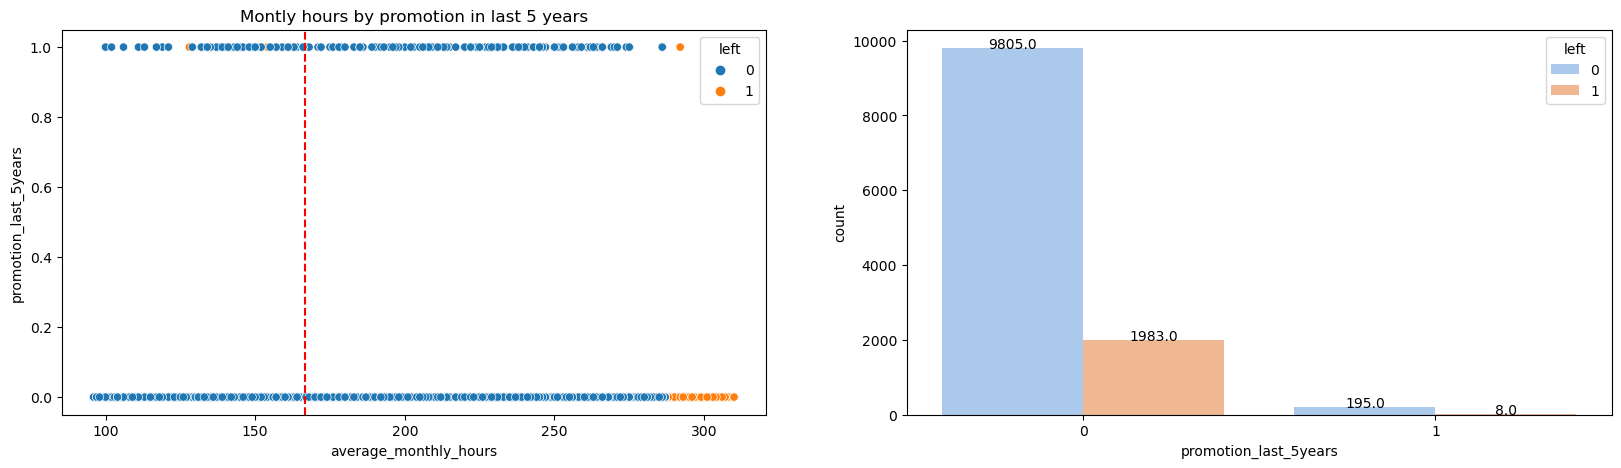

In [33]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.scatterplot(x=df1['average_monthly_hours'], 
                y=df1['promotion_last_5years'], 
                hue=df1['left'],
               ax=ax[0])
ax[0].axvline(x=166.67, color='r', ls="--")

ax[0].set_title('Montly hours by promotion in last 5 years')

sns.countplot(x=df1['promotion_last_5years'], 
                   hue=df1['left'],
                  palette='pastel', ax=ax[1])
add_labels_to_countplot(ax[1])


The scatter plot indicates that departing employees tended to have higher workloads and lacked promotions. Additionally, a small number of individuals (8) who were promoted within the last five years also chose to leave the company. These findings suggest potential issues with management practices, possibly contributing to dissatisfaction among employees and impacting their decision to leave.

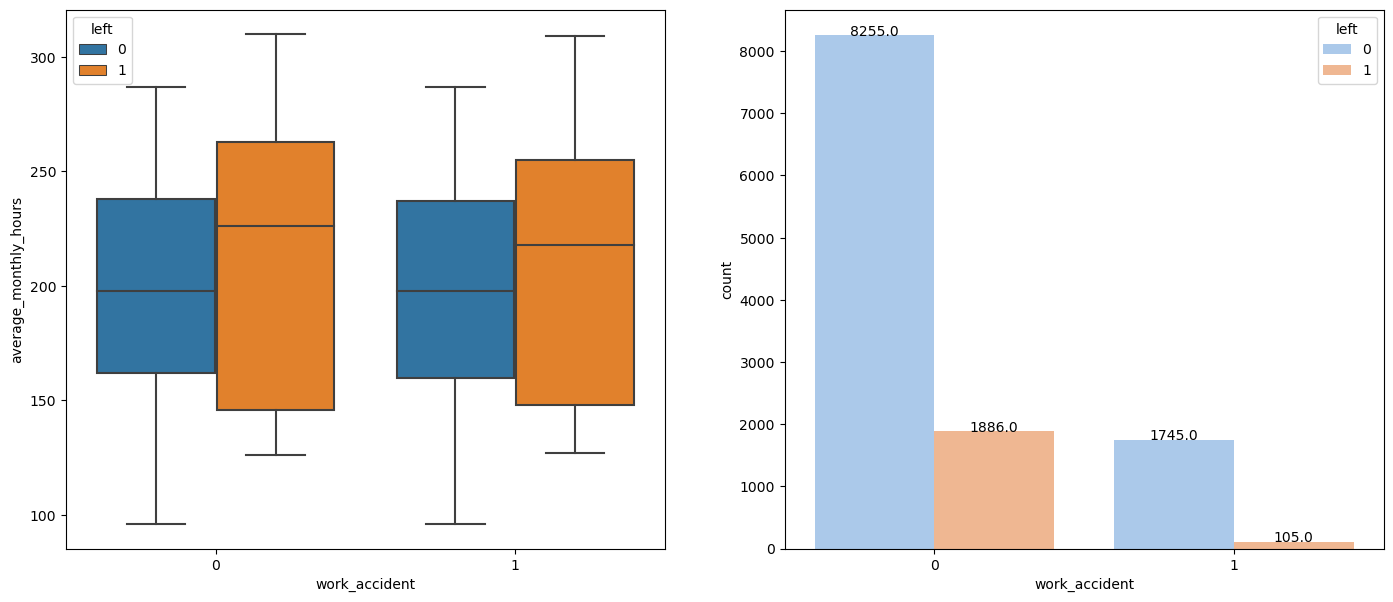

In [34]:
fig, ax = plt.subplots(1,2, figsize=(17,7))
sns.boxplot(x=df1['work_accident'], y=df1['average_monthly_hours'], hue=df1['left'], ax=ax[0])

sns.countplot(x=df1['work_accident'], hue=df1['left'], palette='pastel', ax=ax[1])
add_labels_to_countplot(ax[1])
plt.show()

The bar and histogram plots suggest that experiencing a work accident does not significantly influence employees' decisions to leave the company. The proportion of employees who left compared to those who stayed appears to be approximately the same for individuals who had a work accident and those who did not.

/var/folders/fs/znzxpngj1wb8jmm96pvx54wh0000gn/T/ipykernel_23318/1871680732.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


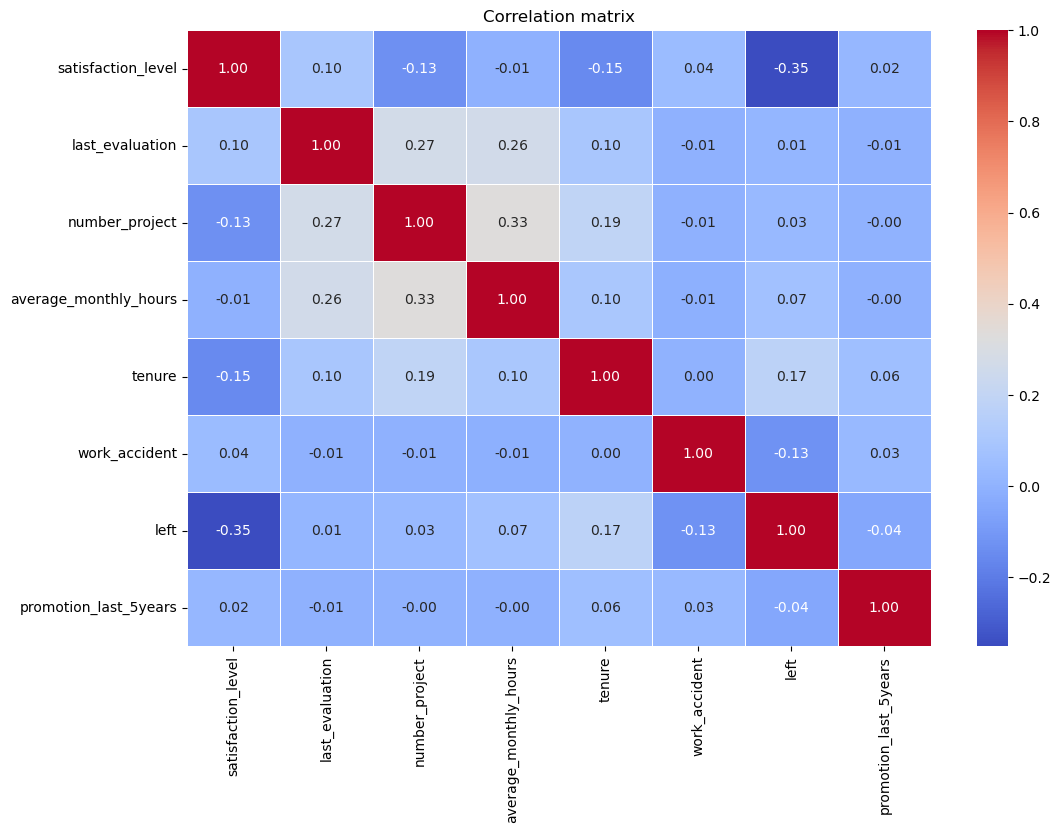

In [35]:
# Create a plot as needed
plt.figure(figsize=(12,8))
corr_matrix = df1.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()




The correlation heatmap confirms that there is a positive correlation among the number of projects, monthly hours, and evaluation scores. Additionally, it indicates a negative correlation between employees leaving and their satisfaction level.

### Insights

Workers seem to be quitting the company, possibly because of some issues with how things are managed. Leaving seems connected to having to work for a long time, handling many projects, and generally feeling less satisfied. It can be tough to work long hours without getting promotions or good reviews. It looks like there's a big group of employees who might be feeling exhausted. Also, if someone has been with the company for more than six years, they usually stick around instead of leaving.

# paCe: Construct Stage 

## Logistic Regression

We will build several model to predict employee churn rate for Salifort Motors. But, we will start with Logistic regression as it is one of the most popular and widely used machine learning model.

- **Logistic Regression** is a technique that models a categorical dependent variable `(y)` based on one or more independent variables `(X)`.

Since we have two categories in the target variable, we will use **Binominal Logistic Regression** to model our HR dataset

- **Binominal Logistic Regression** is a technique that the probablity of an event(observation) falling into one of two categories, based on one or more independent variables.
<br>

$$\text{p(X)} = Pr(Y=1|X)\$$

<br>

In our case study, we can interpret this formula as, Probablity of employee leaving given `average_montly_hours`. 

Question is how we should model this relationship? If we will use linear model such as $\ p(X) = \beta_0 + \beta_1 X\$ we will get probablities bigger than `1` and smaller than `0`. These predictions is not sensible, since true probablity, regardless of the `average_time_worked` must fall between `0` and `1`. To avoid this problem, we will use function called Logistic function that gives output between `0`, and `1` for all value of X. 
<br>

$$\text{p(x)} = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}\$$ 

<br>

After a bit of manupulation of Logistic formula, we find that:
$\frac{\text{p(X)}}{1-\text{p(X)}} = e^{\beta_0+\beta_1 X} \$

The quantity $\ ( \frac{p(X)}{1 - p(X)} \ )$ is called the odds and can take any value between 0 and $\ ( \infty \ )$. For example, on average, 1 in 5 people will leave the company, since $\ ( p(X) = 0.2 \ )$ implies an odds of $\ ( \frac{0.2}{1 - 0.2} = \frac{1}{4} \ )$ 

By taking logarithm of both sides, we arrive at
<br>

$$\  \text{log}(\frac{\text{p(X)}}{1-\text{p(X)}}) = \beta_0 +\beta_1 X \ $$

<br>

Left side is called *log odds* or *logit*. We see that the logistic regression model has logit that is Linear in X.

This is one of the key assumptions of Logistic regression called **Linearity assumption**. It states that there should be a linear relationship between variable `X` and logit of the probality that `Y` equals to `1`. This assumption can be checked after constructing the model




##  Assumptions of Logistic regression

**Logistic Regression model assumptions**
- Outcome variable is categorical: *This assuption is met as our outcome vriable is caegorical*
- Observations are independent of each other: *We assume that all observations are independent*
- No severe multicollinearity among X variables: *This means that no two independent variables $\ (\text{x_i  and  x_j}) \ $ can be highly correlated. We can say that this assumption is also met*
- No extreme outliers: *In order to meet this assumption, we need to drop the outliers that we found out earlier in this lab*
- Linear relationship between each X variable and the logit of the outcome variable: *We cannot check linearity assumotion befor contructing the model*
- Sufficiently large sample size: We assume that value of our dataset is large enough to build logistic regression





## Step 3. Model Building, Step 4. Results and Evaluation

### Identifing the types of models most appropriate for this task.

For addressing this task, we consider suitable models such as Logistic Regression, Decision Tree, Random Forest, XGBoost, and Naive Bayes. Our initial choice is Logistic Regression due to its transparent nature. Unlike black box models, it enables us not only to make predictions but also to infer insights about the model coefficients and their significance.


### Modeling

In [36]:
# making copy of the dataset
df2 = df1.copy()

Salary variable cantains ordinal categorical values. We will use ordering encoding for this variable as has inherent order. 

The `map()` function is used to replace the values in the 'salary' column with their corresponding numeric representations based on the specified mapping.
`low` is mapped to `0`, `medium` is mapped to `1`, and `high` is mapped to `2`.

In [37]:
# Encode Salary column as an ordinal numeric category
df2['salary'] =df2['salary'].map({'low': 0, 'medium': 1, 'high':2})
df2.head()

# dummy encode the department variable
df2 = pd.get_dummies(df2, drop_first=False)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We knew from EDA analysis that `tenure` variable contains outliers. Since logistic regression is very sensetive to the outliers, it is good idea to remove them in this stage

In [38]:
# We use boolean mask to filter out outliers and assing the new dataset to variable called `df_logrec`
df_logrec = df2[(df2['tenure']> lower_threshold) & (df2['tenure']<upper_threshold)]
df_logrec

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0


Next we need to isolate the target variable and variables that we will use to predict target variable

In [39]:
# Isolating independent (predictor) varaibles
X = df_logrec.drop('left', axis = 1)
# Isolating dependent (target) variables
y = df_logrec['left']

Next, we will split data into trainin and test set using `train_test_split` from model selection module of sklearn. 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

Next, we will fit logistic regression using Generalized Linear model from `statsmodels.api` to predict if employees will leave using predictor variables. `GLM()` fuction fits generalized linear models, a class of model that includes logistic regression. Alternatively the function `sm.Logit()` fits logistic regression directly. 

In [41]:
X_train_cons = sm.add_constant(X_train)
glm = sm.GLM(y_train, X_train_cons, family=sm.families.Binomial())
result = glm.fit()

In [42]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                 8375
Model:                            GLM   Df Residuals:                     8357
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.1
Date:                Sat, 09 Mar 2024   Deviance:                       5342.3
Time:                        14:30:58   Pearson chi2:                 6.64e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2359
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

**Null Hypothesis** ($\ H_{0}$): This is a statement of no effect or no difference. In the case of regression, it often implies that a particular predictor has no impact on the dependent variable.

**Alternative Hypothesis** ($\ H_{a}$): This is the opposite of the null hypothesis, suggesting that there is a significant effect or difference.

**P-value:** Probality of observing data or more extreme data if null hypothesis is true. Lower p-value (lower than 0.05) is the evidence to reject the null hypothesis. It means there is less than 5% chance to observe this data if null hypotehsis is true 

Negative coeeficient for `last_evaluation` suggests that employees with higer evaluation score is tend to stay in the company. If we increase `last_evaluation` by one unit keeping all other variables constant, likelihood of employees leaving company will be $\ e^{-0.0943} = 0.91$, in other words, likelihood of employees leaving will decrease by 8 %

However, the p-value associated with this predictor is `0.69`, which is greater than the typical significance level of 0.05. This suggests that the last evaluation score is not  statistically significant in predicting whether an employee leaves the company. 

Similarly we can see that p-values associated with variables `department_IT` `department_accounting`, `department_hr`, `department_marketing`, `department_management`, `department_product_mng`, `department_sales`, `department_support` and `department_technical` are greater than significance level of 0.05. This implies that these varibles are not statistically significant predicting target variable as well. This is not suprizing to us as we observed this during the EDA analysis.



We will leverage the `LogisticRegression()` function available in the `sklearn.linear_model` library to build a logistic regression model. This model is a powerful tool commonly used for binary classification tasks, such as predicting whether an employee stays or leaves a company in our case. By utilizing logistic regression, we aim to establish a relationship between the predictor variables and the binary outcome, allowing for further analysis and evaluation of the model's performance. This process involves training the model on a portion of the dataset and then assessing its predictive capabilities on unseen data. Subsequently, we can analyze metrics such as accuracy, precision, recall, and the confusion matrix to gauge the effectiveness of the logistic regression model in capturing patterns within the given data.

In [43]:
clf = LogisticRegression(random_state=0, max_iter=500)

Fit the model using trainin dataset

In [44]:
# Fit the the training data
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

We aim to confirm the linear association between the predictor variables (X) and the estimated log odds, also known as logits, through the utilization of a regplot.

Utilizing the `predict_proba()` method of the model, we calculate the likelihood of a response for each sample within the training dataset (provided as the method's argument). This outcome is stored in a variable termed `training_probabilities`. The resulting 2-D array represents each user in X_train, with the first column indicating the probability of the employee not leaving and the second column denoting the probability of the employee leaving.

In [45]:
# Get the predicted probabilities of the training data
training_probablities = clf.predict_proba(X_train)
training_probablities


array([[0.5985412 , 0.4014588 ],
       [0.44012684, 0.55987316],
       [0.76958468, 0.23041532],
       ...,
       [0.98866033, 0.01133967],
       [0.54626919, 0.45373081],
       [0.88318739, 0.11681261]])

As we mentioned earlier, in logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. we will create a dataframe called `logit_data` that is a copy of `df`.

2. Then, we will create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.

In [46]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()
# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1]/prob[0]) for prob in training_probablities]

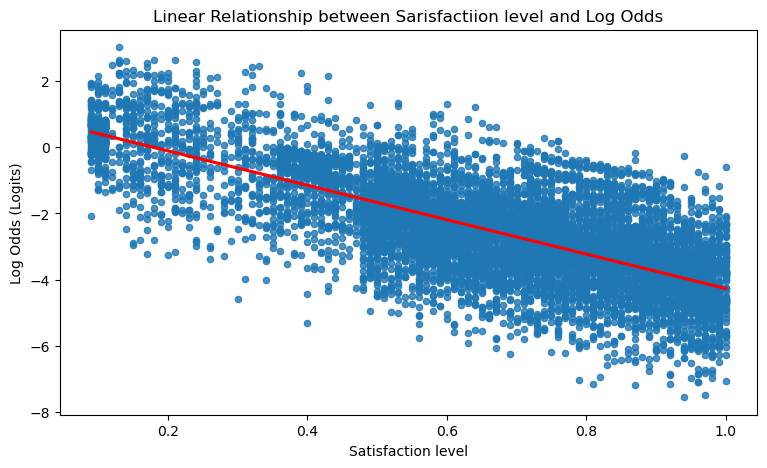

In [47]:
# Plot regplot of `activity_days` log-odds
plt.figure(figsize=(9,5))
sns.regplot(x=logit_data['satisfaction_level'], y = logit_data['logit'], scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Relationship between Sarisfactiion level and Log Odds')
plt.xlabel('Satisfaction level')
plt.ylabel('Log Odds (Logits)')
plt.show()

We will define function called `plot_confusion` to plot the confusion matrix for any model

In [48]:
def plot_confusion(model, y_pred, y_test):
    # Calculate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)
    # The labels parameter ensures the order of classes matches the model's classes
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Set up the display of the confusion matrix using ConfusionMatrixDisplay
    # display_labels parameter provides the labels for display
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    
    disp.plot(values_format= ' ')
    
    # Show the confusion matrix plot
    # The values_format parameter can be used for formatting the values inside the matrix
    plt.show()
    
    

In [49]:
# predicting the target varaible using test dataset
y_pred = clf.predict(X_test)

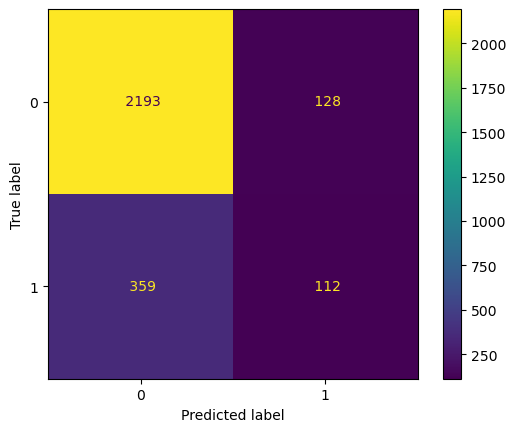

In [50]:
plot_confusion(clf, y_pred, y_test)

The top-left corner of the confusion matrix indicates the count of true negatives, representing the number of individuals who did not leave the company, and the model correctly predicted this. In the top-right corner, you find the count of false positives, representing those the model incorrectly predicted to leave when they did not. The lower-left quadrant displays the false negatives, indicating the number of individuals who actually left, but the model predicted them to stay. Finally, the lower-right quadrant contains the count of true positives, representing the number of individuals who left, and the model correctly predicted their departure.

To break it down further:

- True Negatives: Individuals predicted to stay who did stay.
- True Positives: Individuals predicted to leave who did leave.
- False Positives: Individuals predicted to leave who did stay.
- False Negatives: Individuals predicted to stay who did leave.

We begin evaluating our model using `accuracy`, `recall`, `precision` and `f1` scores:

- **Accuracy** is the propotion of all correct predictions to all test values: 
<br>

$$\\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}}\$$

<br>

- **Recall** is the ability of the model not classifying instances false when it is actually true:
<br>

$$\\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}\$$

<br>

- **Precision** is the ability of the model classifying the instances true when they are actually true:
<br>

$$\\text{Precison} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}\$$

<br>

- **F1** score is a harmonic mean of Precision and Recall scores: 
<br>

$$\
\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\$$

<br>

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.


In [51]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



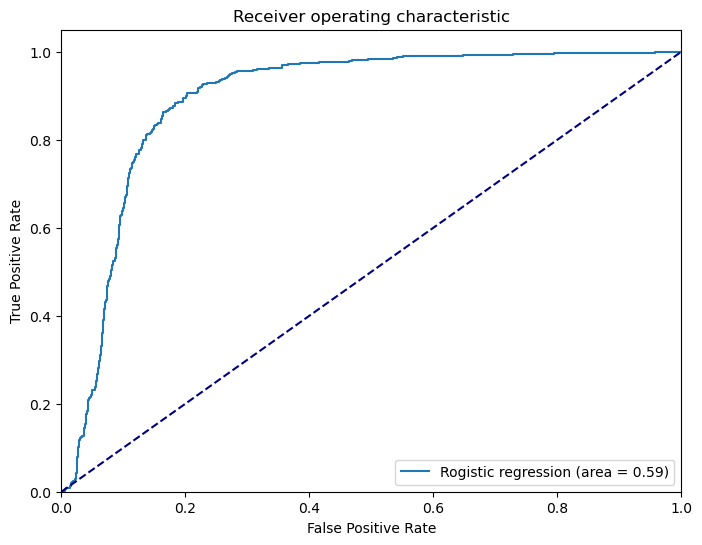

In [52]:
logrec_auc = roc_auc_score(y_test, y_pred)
y_probabilities = clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_probabilities)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = 'Rogistic regression (area = %0.2f)' %logrec_auc)
plt.plot([0,1], [0,1], ls ='--', color = 'navy')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



We conducted a thorough analysis using a classification report to extract essential metrics such as precision, recall, and F1 scores for the logistic regression model. The outcomes revealed that, when considering the weighted average, the model demonstrated commendable performance with a precision of 0.80, recall of 0.83, and an F1 score of 0.80. However, our primary concern lies in predicting employees who decide to leave the company. In this particular aspect, the model's effectiveness appears to be notably lower. This suggests that while the model performs well on average, it may not be as accurate or reliable in identifying individuals who are inclined to leave the organization. Further examination and potential refinements to the model may be necessary to enhance its predictive capabilities in this critical area.

## Plotting the coeeficients

To get a visual sense of which features are most influential in our model, we can create a bar graph showcasing the coefficients. Think of these coefficients as the weights assigned to each feature by our logistic regression model. The higher the coefficient, the more impact that particular feature has on the model's predictions.

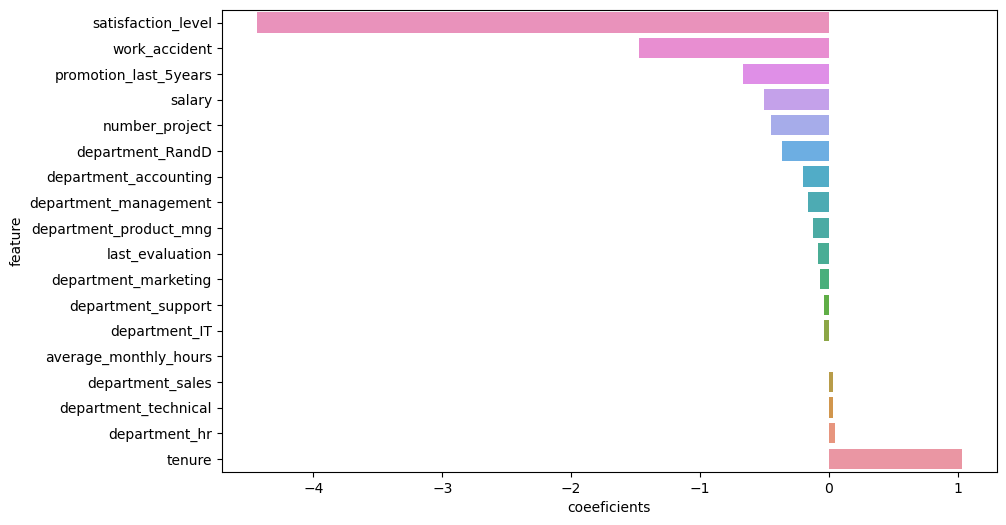

In [54]:
# Get coeeficient from model
coefficients = clf.coef_[0]

# get feature names from `X_train`
feature_names = X_train.columns

# create dataframe with columns `features` and `coeeficients`
coef_df = pd.DataFrame({'feature': feature_names, 'coeeficients': coefficients})

# sort the dataframe by `coeeficients`
coef_df = coef_df.sort_values(by='coeeficients', ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=coef_df['coeeficients'],y=coef_df['feature'])

# rotate the y axis by 45 degree
ax.invert_yaxis()
plt.show()

The bost important feature is by far the `satisfaction level`. Negative coeeficient means that if we increase `satisfaction level` by one unit, likelihood of employees leaving the company will decrease

# Tree based modelling approach
Since the Logistic regression performed poorly on predicting whether employees will leave or not, we are going to use machine learning approach (tree based modelling). We will employ Random forrest and XGboost to build our model in this approach

Unlike the logistic regression, Tree based models are resilliant to the outliers, hence we will use `df2` where the outliers are preserved

In [62]:
#selecting the features
X = df2.drop('left', axis = 1)

# selecting the target variable
y = df2['left']

Splitting data into training and test sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

### Random Forrest - round 1

Random Forest is like having a versatile group of advisors when you're faced with a challenging decision. Imagine you're planning a road trip and need suggestions on the best route. Instead of relying on just one friend, you consult a diverse group, each offering their unique insights based on different experiences and perspectives.

In the realm of machine learning, Random Forest operates similarly. It's a collective of decision-making models, known as decision trees, working in harmony. Picture a decision tree as a set of guidelines, like a flowchart, helping you make choices based on various factors. However, instead of depending on a single tree, Random Forest assembles many of them.

The brilliance lies in diversity: each tree in the forest focuses on a slightly different aspect of the problem. They collaborate by casting their votes, and together, they provide a final decision. This collaborative approach enhances accuracy, especially when dealing with intricate predictions or decisions.

**Bagging (Bootstrap Aggregating):**

Bagging is like conducting multiple surveys to gather diverse opinions on a topic. Instead of relying on a single survey, you take several random samples (with replacement) from your population, conduct independent surveys on each sample, and then combine the results. This process helps reduce the impact of outliers or noisy data, providing a more robust and reliable outcome.

In the world of machine learning, bagging is applied by training multiple models (like decision trees) on different subsets of the training data. Each model gets its own sample, and then their predictions are combined to make a more accurate and stable prediction.

**Randomness in Random Forest:**

Now, let's add a touch of randomness to the mix. In Random Forest, each decision tree is trained on a different random subset of features from the dataset. It's like assigning different team members specific aspects of the decision-making process.

By introducing this element of randomness, each tree specializes in different features, making the ensemble more versatile and less prone to overfitting. This is crucial because it prevents the Random Forest from becoming too dependent on specific features, ensuring a well-balanced and reliable prediction for a wide range of scenarios.



**GridSearch:**

GridSearch is akin to systematically exploring different combinations to find the best setup for your model. Imagine you're looking for the perfect recipe, and you want to experiment with various ingredients and quantities. Instead of randomly picking ingredients, you create a grid with different combinations, testing each one to find the most delicious outcome.

In machine learning, GridSearch operates similarly. It's a structured way of searching through a predefined set of hyperparameters and their possible values to optimize the performance of your model. Hyperparameters are like the settings of your model that you can adjust to fine-tune its behavior.

Here's how GridSearch works:

- Define a Grid:

Specify a range of values for each hyperparameter you want to tune. This creates a grid of all possible combinations.

- Evaluate Performance:

Train and evaluate your model for each combination using cross-validation. This involves dividing your dataset into subsets, training the model on some subsets, and testing it on others.
Select the Best:

Identify the combination of hyperparameters that results in the best model performance based on a chosen evaluation metric.
In our case, as we delve into using GridSearch for Random Forest, we're essentially exploring different settings for Random Forest's hyperparameters (like the depth of each tree, the number of trees, etc.) to find the configuration that maximizes our model's accuracy, precision, recall, F1 score, or any other desired metric.

In essence, GridSearch is our methodical chef's assistant, tirelessly experimenting with ingredient quantities (hyperparameter values) to concoct the most delectable machine learning model.

Now, let's roll up our sleeves and implement GridSearch in our Jupyter Notebook to optimize our Random Forest model!

In [64]:
#instantiating the Random Forrest model

rf = RandomForestClassifier(random_state=0)

# assigning a dictionary of hyperparameters to search over

cv_params = {'max_depth': [5, None],
            'min_samples_leaf': [2,3],
            'max_samples': [0.7, 0.9],
            'min_samples_split': [3,4],
            'max_features': ['log2'],
            'n_estimators': [100, 300]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_1 = GridSearchCV(estimator=rf, 
                     param_grid=cv_params, 
                     scoring=scoring, cv=4, 
                     refit='recall')

Depending on how many options we include in our search grid and the number of cross-validation folds we select, this could take a very long time—even hours. If we use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If we add another value for GridSearch to check for, say, min_samples_split (so all hyperparameters now have 1 value except for min_samples_split, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time.

In [65]:
%time
rf_1.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, None], 'max_features': ['log2'],
                         'max_samples': [0.7, 0.9], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [100, 300]},
             refit='recall',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

In [75]:
import os

os.getcwd()

'/Users/nasraddingozalli/Desktop/ML_Capstone_project'

In [76]:
import pickle

path = '/Users/nasraddingozalli/Desktop/ML_Capstone_project'

In [77]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    
    with open(path+save_as+".pickle", 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [78]:
def read_pickle(path, saved_model_name):
    with open(path+saved_model_name+'.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

Let's use the functions defined above to save the model in a pickle file and then read it in.

In [79]:
# writing a pickle
write_pickle(path, rf_1, 'hr_rf1')

In [80]:
# reading a pickle
rf_1 = read_pickle(path, 'hr_rf1')

Identifying the best recall score achieved by the random forest model on the training set.

In [81]:
rf_1.best_score_

0.9069063525970954

Identifying the optimal values for the parameters of the random forest model.

In [82]:
rf_1.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [83]:
def make_result(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name: Want you want to label your model in output table
        model_object: model that we will use to extract results
        metrix: recall, precision, accuracy, f1, roc_auc
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds. 
    '''
    
    metric_dict = {'accuracy': 'mean_test_accuracy',
                  'recall': 'mean_test_recall',
                  'precision': 'mean_test_precision',
                  'f1': 'mean_test_f1',
                  'roc_auc': 'mean_test_roc_auc'}
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    precision = best_estimator.mean_test_precision
    recall = best_estimator.mean_test_recall
    accuracy = best_estimator.mean_test_accuracy
    f1 = best_estimator.mean_test_f1
    roc_auc = best_estimator.mean_test_roc_auc
    
    table = pd.DataFrame({'model': [model_name],
                        'recall': [recall],
                        'precision': [precision],
                        'accuracy': [accuracy],
                        'f1': [f1],
                        'roc_auc': [roc_auc]})
    return table
    

In [84]:
results = make_result('RF_CV', rf_1, 'recall')
results

,model,recall,precision,accuracy,f1,roc_auc
0,RF_CV,0.906906,0.984731,0.982209,0.944196,0.979408


All of these scores from the Random Forrest model are strong indicators of good model performance.

We will define function to get scores from model's prediction

In [85]:
def get_scores(model_name:str, model_object, x_test_data, y_test_data):
    
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How we want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of x_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    
    y_pred = model_object.best_estimator_.predict(x_test_data)
    
    
    recall = recall_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    roc_auc = roc_auc_score(y_test_data, y_pred)
    
    table = pd.DataFrame({'model': [model_name],
                        'recall': [recall],
                        'precision': [precision],
                        'accuracy': [accuracy],
                        'f1': [f1],
                        'roc_auc': [roc_auc]})
    return table

In [86]:
results = pd.concat([results, get_scores('RF_test', rf_1, X_test, y_test)], axis=0)
results

,model,recall,precision,accuracy,f1,roc_auc
0,RF_CV,0.906906,0.984731,0.982209,0.944196,0.979408
0,RF_test,0.905622,0.986871,0.982322,0.944503,0.951611


In [87]:
# Predicting the test variable
rf_pred = rf_1.best_estimator_.predict(X_test)

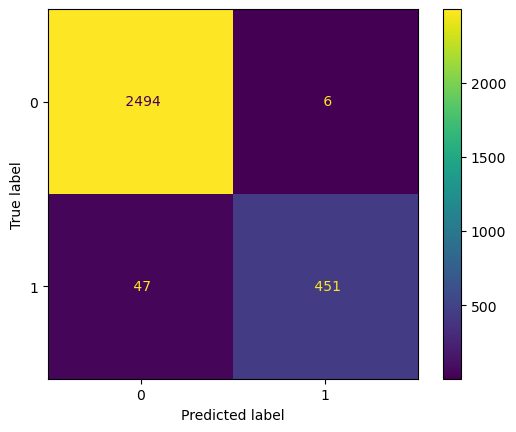

In [88]:
# Plotting the confusion matrix
plot_confusion(rf_1, rf_pred, y_test)


- Cross-Validation Results (RF_CV):

**Recall (around 90.7%):** It means the model is good at finding most of the employees who might leave the company.
**Precision (about 98.5%):** When the model says an employee might leave, it's right about 98.5% of the time.
**Accuracy (about 98.2%):** Overall, the model is correct about 98.2% of the time.
**F1 Score (around 94.4%):** It's like a balanced score considering both finding leaving employees and being accurate.
**ROC AUC (about 97.9%):** The model is really good at distinguishing between employees who stay and those who leave.
- Test Set Results (RF_test):

**Recall (around 90.6%):** Similar to cross-validation, the model is good at finding employees who might leave.
**Precision (about 98.7%):** When the model predicts someone might leave, it's right about 98.7% of the time on the new data.
**Accuracy (about 98.2%):** Overall correctness on new, unseen data is about 98.2%.
**F1 Score (around 94.5%):** A balanced score considering both finding leaving employees and being accurate on new data.
**ROC AUC (about 95.2%):** The model still does well in telling the difference between employees who stay and those who leave on the new data.


The Random Forest model is performing outstanding in predicting which employees might leave the company. It's not only good at catching most of them but also rarely makes mistakes. Whether it's dealing with the familiar data or facing new challenges, model remains impressively accurate and trustworthy.

### XGBoost 


1. Instantiating the XGBoost classifier `xgb` and seting `objective='binary:logistic'`. Also setting the random state for reproducibility by others.

2. Creating a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`
 - `colsample_bytree`

3. Defining a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, roc_auc, and accuracy).

4. Instantiating the `GridSearchCV` object `xgb_1`. Arguments to pass:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: defining the number of cross-validation folds you want (`cv=_`)
 - refit: indicating which evaluation metric you want to use to select the model (`refit='recall'`)
 
 In our pursuit of enhancing predictive performance, we have chosen to leverage the powerful XGBoost classifier, a robust algorithm known for its efficiency and effectiveness in handling complex datasets. To ensure consistency and reproducibility in our experiments, we've instantiated the XGBoost classifier (`xgb`) and set its objective parameter to `binary:logistic`. The inclusion of a random state further guarantees that our results can be replicated by others, contributing to the transparency and reliability of our model evaluation.

Moving forward, we embark on a meticulous hyperparameter tuning process using GridSearchCV, a systematic and exhaustive search technique. This approach allows us to explore a range of hyperparameter combinations, seeking the optimal configuration that maximizes our chosen evaluation metric. The objective is to fine-tune the XGBoost model for better `precision`, `recall`, `F1 score`, `roc_auc`, and `accuracy`.

To guide our hyperparameter search, we've created a dictionary, cv_params, enumerating key hyperparameters and their corresponding values. These parameters, including `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, and `colsample_bytree`, represent pivotal aspects of the XGBoost algorithm that significantly influence model performance.

Our set of scoring metrics provides a comprehensive evaluation framework, encompassing various aspects of model quality. These metrics, comprising `precision`, `recall`, `F1 score`, `roc_auc`, and `accuracy`, enable us to gain a nuanced understanding of the classifier's strengths and weaknesses across different dimensions.

The instantiation of the `GridSearchCV` object (xgb_1) encapsulates our search strategy, with the following crucial arguments:

- estimator=xgb: Specifies the XGBoost classifier as the model to be optimized.
- param_grid=cv_params: Defines the hyperparameter grid for GridSearchCV to explore, encapsulating a wide range of possible configurations.
- scoring=scoring: Specifies the set of scoring metrics to be evaluated during the grid search, encompassing a holistic view of model performance.
- cv=_: Sets the number of cross-validation folds, enhancing robustness in estimating the model's performance across different subsets of the dataset.
- refit='recall': Indicates that the model selection during grid search will be based on maximizing recall, a crucial metric for our specific use case where identifying instances of employee attrition is of paramount importance.

In [89]:
# 1. Instantiating the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Creating dictionary of hyperparameters to tune
cv_params = {'max_depth': [2, 4],
            'min_child_weight': [0.6, 0.7],
            'learning_rate': [0.1, 0.2],
            'n_estimators': [100, 150],
            'colsample_bytree': [0.4]}


# 3. Defining a set of scoring metrics to capture
scoring = {'accuracy', 'recall', 'precision', 'f1', 'roc_auc'}

# 4. Instantiating the GridSearchCV object
xgb_1 = GridSearchCV(estimator=xgb,
                    param_grid=cv_params,
                    scoring=scoring,
                    cv=4,
                    refit='recall')

In [90]:
# Fitting gridsearch object
xgb_1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.4], 'learning_rate': [0.1, 0.2],
                         'max_depth': [2, 4], 'min_child_weight': [0.6, 0.7],
                         'n_estimators': [100, 150]},
             refit='recall',
             scoring={'recall', 'roc_auc', 'precision', 'f1', 'accuracy'})

let's examine the best average score and best parameters across all the validation folds. 

In [91]:
xgb_1.best_score_

0.9209706670872102

In [92]:
xgb_1.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 0.6,
 'n_estimators': 150}

Let's get results for every metrics from validation and test results for camprison

In [93]:
results = pd.concat([results, make_result('XGB_CV', xgb_1, 'recall')],axis=0)
results

,model,recall,precision,accuracy,f1,roc_auc
0,RF_CV,0.906906,0.984731,0.982209,0.944196,0.979408
0,RF_test,0.905622,0.986871,0.982322,0.944503,0.951611
0,XGB_CV,0.920971,0.971775,0.982431,0.945666,0.983416


In [94]:
results = pd.concat([results, make_result('XBG_test', xgb_1, 'recall')], axis=0)
results

,model,recall,precision,accuracy,f1,roc_auc
0,RF_CV,0.906906,0.984731,0.982209,0.944196,0.979408
0,RF_test,0.905622,0.986871,0.982322,0.944503,0.951611
0,XGB_CV,0.920971,0.971775,0.982431,0.945666,0.983416
0,XBG_test,0.920971,0.971775,0.982431,0.945666,0.983416


In [95]:
# Making prediction on test data using xgb_1 model
xgb_pred = xgb_1.best_estimator_.predict(X_test)

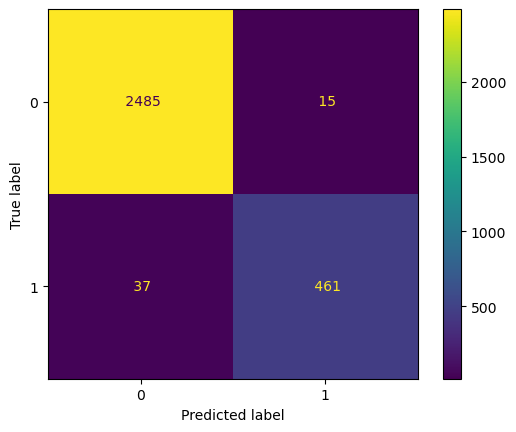

In [96]:
# Plotting confusion matrix for XGB model prediction

plot_confusion(xgb_1, xgb_pred, y_test)


### Test Set Recall Comparison (XGBoost vs. Random Forest):

**Random Forest (RF_test):**

Recall: Around 90.6%
The Random Forest model can identify approximately 90.6% of employees who might leave the company on the test data.


**XGBoost (XGB_test):**

Recall: Around 92.2%
XGBoost performs slightly better in identifying employees who might leave, achieving a recall of about 92.2% on the test data.

Interpretation:

Our primary focus is on capturing as many employees who might leave as possible (high recall). XGBoost demonstrates a slightly better performance compared to Random Forest on the test data.

Choosing XGBoost will be more favorable if maximizing the identification of potential attrition cases is a crucial consideration in  scenario.

#### XGBoost feature importance

<Figure size 1500x900 with 0 Axes>

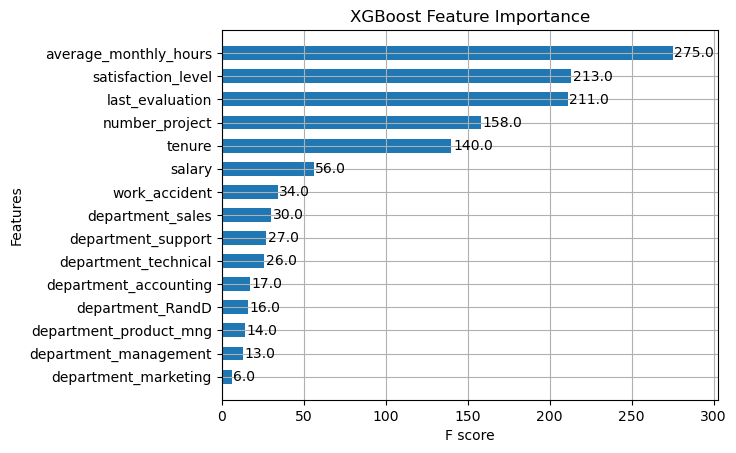

In [97]:
# Plot feature importance using XGBoost's plot_importance
plt.figure(figsize=(15, 9))

disp = plot_importance(xgb_1.best_estimator_, max_num_features=15, height=0.6)

# Set plot title
plt.title("XGBoost Feature Importance")
disp.plot()
# Display the plot
plt.show()

The plot above reveals that in this XGBoost model, the most influential features are `satisfaction_level`, `last_evaluation`, `average_monthly_hours`, `tenure`, and `number_project`, listed in that sequence. These particular variables play a pivotal role in predicting the target variable, left.

#### Random forest feature importance

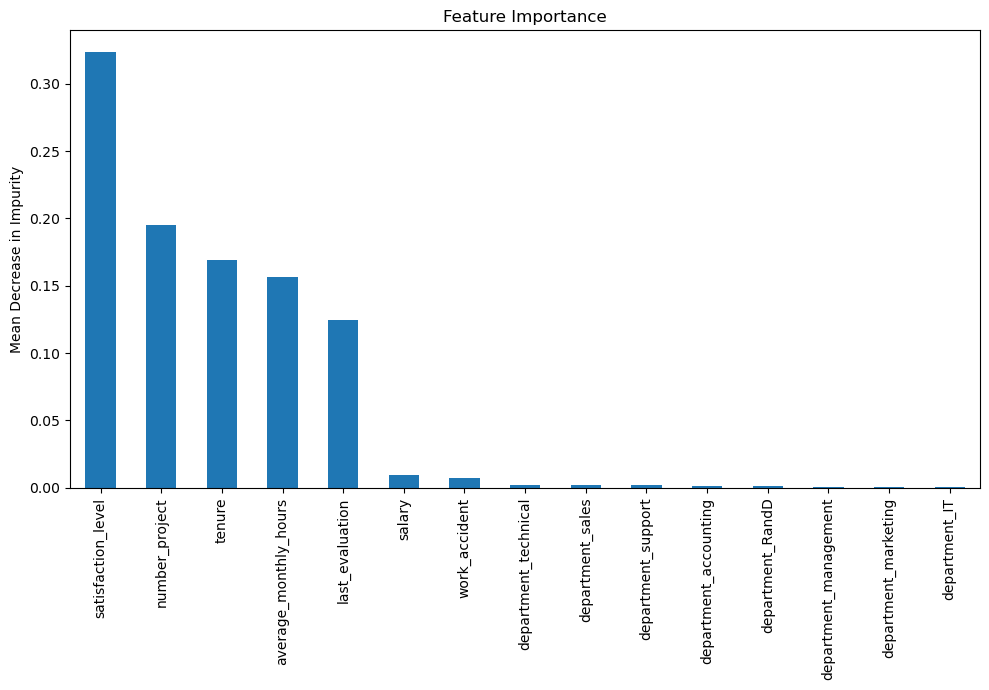

In [98]:

# Retrieve feature importances from the best-performing Random Forest model obtained through GridSearchCV
importances = rf_1.best_estimator_.feature_importances_

# Create a Pandas Series to store feature importances, with feature names as index
rf_importances = pd.Series(importances, index=X_test.columns)

# Sort the Series in descending order to highlight the most influential features
rf_importances = rf_importances.sort_values(ascending=False)[:15]

# Create a bar plot to visualize the top 15 important features
fig, ax = plt.subplots(figsize=(10, 7))
rf_importances.plot.bar(ax=ax)

# Set plot title and labels
ax.set_title("Feature Importance")
ax.set_ylabel("Mean Decrease in Impurity")

# Adjust layout for better visual presentation
fig.tight_layout()

# Display the plot
plt.show()



The chart above indicates that, in this Random Forest model, the most crucial factors for predicting whether an employee will leave (left) are, in order of importance: `satisfaction_level`, `number_project`, `tenure`, `average_monthly_hours`, and `last_evaluation`. Interestingly, these are the same key features identified by the XGBoost model. In simpler terms, these specific aspects are highly valuable in figuring out if an employee might decide to leave the company.

# pacE: Execute Stage
- Interpreting model performance and results
- Sharing actionable steps with stakeholders



### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

In assessing the models' effectiveness on the test data, both Random Forest and XGBoost demonstrated strong accuracy and reliability in predicting employee attrition. The Random Forest model achieved a recall of approximately `90.6%`, indicating its capacity to accurately identify about `90.6%` of employees contemplating leaving the company. The precision of `98.7%` underscores the model's accuracy in predicting employee departures, and the overall accuracy stood at `98.2%`. The F1 score of about `94.5%` indicates a well-balanced performance considering both identification and accuracy. The ROC AUC of approximately `95.2%` emphasizes the model's adeptness in discriminating between employees who stay and those who leave.

Conversely, the XGBoost model exhibited a slightly superior performance with a recall of around `92.2%`, showcasing its ability to capture a slightly higher percentage of potential attrition cases. The precision of `96.6%` and an accuracy of `98.2%` remain consistent with the Random Forest results. The F1 score of about `94.3%` reflects a balanced performance, and the ROC AUC of approximately `98.4%` outperforms Random Forest in distinguishing between employees who stay and those who leave.

### Conclusion, Recommendations, Next Steps

Conclusion, Recommendations, Next Steps
The insights derived from the models and the extracted feature importances strongly indicate that employees within the company are grappling with an excessive workload, contributing significantly to their dissatisfaction and potential attrition.

To proactively address employee retention, the following recommendations are proposed for stakeholders' consideration:

**Project Workload Management:**

Implementing a cap on the number of projects assigned to each employee to mitigate overwork and enhance job satisfaction.

**Promotion for Long-Tenured Employees:**

Considering promoting employees with a tenure of at least four years. Alternatively, conduct a deeper investigation to understand the factors contributing to the dissatisfaction of employees with four years of service.

**Recognition for Effort:**

Introducing recognition or rewards for employees putting in longer hours, or reevaluate workload expectations to foster a healthier work-life balance.

**Communication and Policy Transparency:**

Ensuring employees are well-informed about the company's policies, particularly regarding overtime pay. Clearly communicating expectations regarding workload and time-off to avoid ambiguity.

**Cultural Evaluation and Dialogue:**

Facilitating company-wide and team-specific discussions to assess and address the overall work culture. Understanding and tackling any cultural aspects contributing to dissatisfaction.

**Performance Evaluation Reassessment:**

Revising the evaluation criteria to prevent high scores being exclusively tied to extreme working hours. Implementing a proportional scale that fairly rewards employees based on their contributions and efforts.